# Análisis Exploratorio de Datos.

## Introducción.

Con motivo de tener un Dataset más organizado y para completar los endpoints solicitados, la etapa de transformación se realizó en otro archivo, por lo que los pasos cómo eliminar columnas que no son necesarias y eliminar datos nulos ya fueron realizados y no se tocaran en este archivo.

In [21]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS


In [2]:
movies = pd.read_csv('../assets//movies.csv', delimiter=',', encoding='utf-8')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572 entries, 0 to 2571
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  2572 non-null   object 
 1   budget                 2572 non-null   float64
 2   genres                 2572 non-null   object 
 3   id                     2572 non-null   int64  
 4   original_language      2572 non-null   object 
 5   overview               2572 non-null   object 
 6   popularity             2572 non-null   float64
 7   production_companies   2572 non-null   object 
 8   production_countries   2572 non-null   object 
 9   release_date           2572 non-null   object 
 10  revenue                2572 non-null   float64
 11  runtime                2572 non-null   float64
 12  spoken_languages       2572 non-null   object 
 13  status                 2572 non-null   object 
 14  tagline                2572 non-null   object 
 15  titl

### Análisis de columnas

El dataset original contaba con varias columnas que fueron eliminadas en el notebook de ETL, las columnas que se consideran importantes fueron:

- **budget:** El presupuesto de la película, en dólares.
- **genres:** Un diccionario que indica todos los géneros asociados a la película.
- **original language:** Idioma original en el que se grabó la película.
- **production_countries:** Lista con los países donde se produjo la película.
- **release_date:** Fecha de estreno de la película.
- **revenue:** Recaudación de la película, en dólares.
- **runtime:** Duración de la película, en minutos.
- **title:** Título de la película.
- **vote_average:** Puntaje promedio de reseñas de la película.
- **vote_count:** Número de votos recibidos por la película en TMDB.
- **return:** Porcentaje representativo del retorno de inversión.


Las columnas que contienen diccionarios y listas se consideró que estas se desnudaran una vez que se requieran analizar los datos. Esto debido a que una fila puede contener más de un dato y esto conlleva a crear un CSV de géneros y otro que contenga la relación entre cada película y sus géneros.

#### genres:

En esta columna podemos observar que tenemos variables categóricas, de las cuales los géneros de *Acción* & *Comedia* son los que cuentan con mayor cantidad de películas.


In [3]:
genres = movies['genres'].apply(ast.literal_eval).explode('genres').apply(lambda x: x.get('name') if isinstance(x, dict) else None)


Text(0, 0.5, 'Genero')

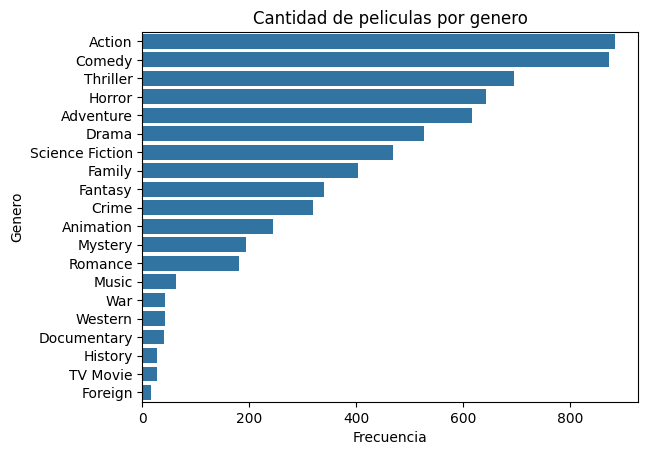

In [4]:
order = genres.value_counts().index
sns.countplot(data=genres, order=order)
plt.title('Cantidad de peliculas por genero')
plt.xlabel('Frecuencia')
plt.ylabel('Genero')

#### release_date:

Como se puede apreciar en la gráfica, a partir de **1970** existió un aumento exponencial en la producción de películas. Además se puede apreciar que a partir del **2015** se tiene registro de muy pocas películas, lo que se podría entender de esto es que el dataset es de pocos años posterior a dicha fecha y aún no se tenían cargados todos los títulos que fueron lanzados después de **2015**. 

Text(0, 0.5, 'Frecuencia')

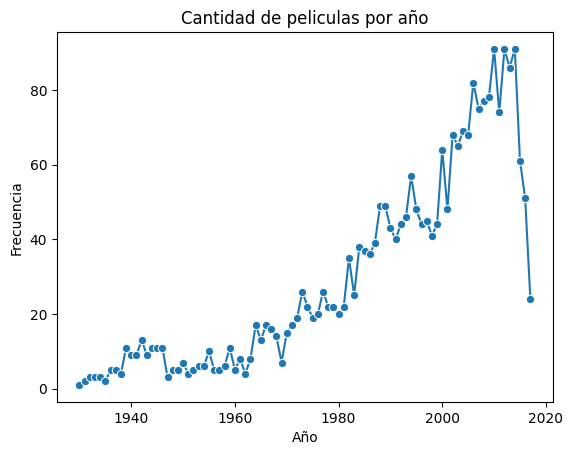

In [5]:
release_year = movies.groupby('release_year').size().reset_index(name='cantidad_estrenos')

sns.lineplot(data=release_year, x='release_year', y='cantidad_estrenos', marker='o')
plt.title('Cantidad de peliculas por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

#### return:

Esta columna se calculó mediante una división entre las columnas **revenue** & **budget**, y para evitar que se generarán errores, se asignó el valor de **0** a las filas que tuvieran valores nulos en dichas columnas. Como podemos ver, las películas que cuentan con valor **0** son la mitad de nuestro dataset, se procederá a eliminarlas para no generar confusión en futuros análisis.

In [6]:
roi = (movies['return'] == 0).sum()
roi

np.int64(1436)

In [7]:
no_return = movies['return'] > 0
movies = movies[no_return]

### Análisis multivariables:

Dentro de la produccion de peliculas se busca obtener siempre el mayor retorno de inversión, realizando un análisis correlacional con las columnas de **budget**, **release_year**, **return** y **vote_average**, podemos observar que el retorno de inversión solo se encuentra pequeñamente relacionado a la puntuación que recibe cada película. Por otro lado podemos ver que existe una buena relación entre el presupuesto y el año de estreno, lo que puede indicar que cada año se requiere más presupuesto para producir películas.

<Axes: >

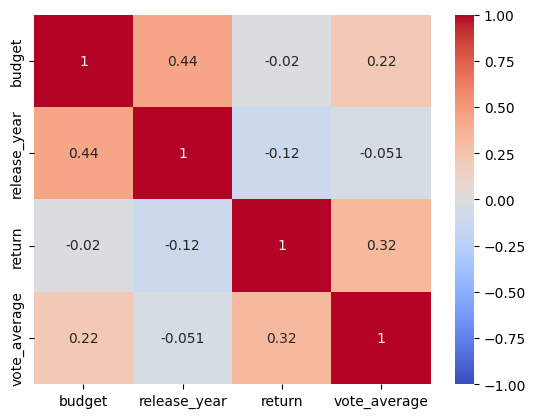

In [17]:
correlation_matrix = movies[['budget','release_year','return','vote_average']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

### Nube de Palabras:

Como motivo de identificar las palabras que más se utilizan en los títulos de las películas se realizó una nube de palabras.

In [19]:
movies_titles = " ".join(movies['title'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movies_titles)


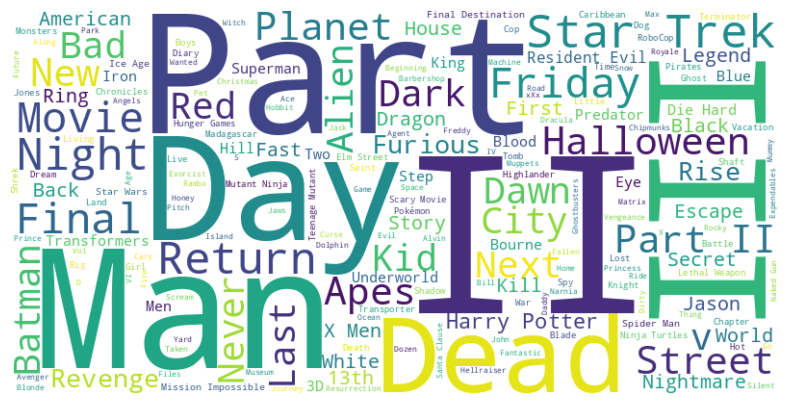

In [20]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Como se puede observar las palabras *part*, *II*, *III* son muy usadas, pero debido a que no agregan mucho valor a este análisis se procede a eliminarlas

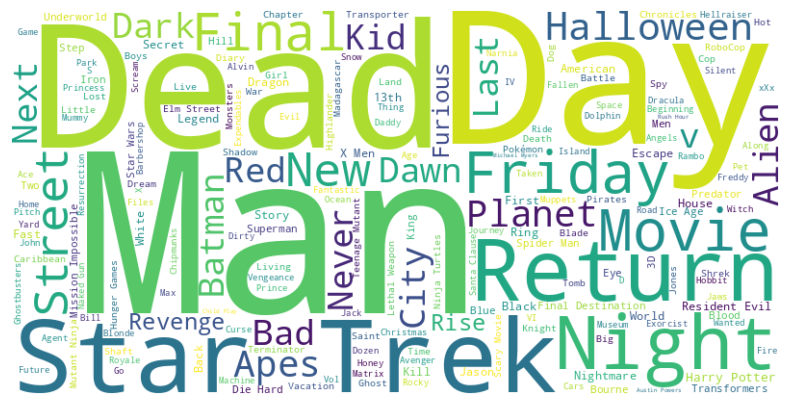

In [25]:
stopwords = set(STOPWORDS).union({"Part","II","III"})
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(movies_titles)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()